### Testing mean coverage to set filtering threshold

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import datetime
import matplotlib as plt
from collections import defaultdict
from IPython.core.display import HTML
import matplotlib.pyplot as plt
HTML("<style>.container { width:100% !important; }</style>")

In [2]:
curr_dir = !pwd
domains_th = "10"
input_path = curr_dir[0]+"/../6.Ext_features_to_dicts/ext_features_dicts/pfam-v30/"

#Read the list of domains
with open(curr_dir[0]+"/../5.domains_stats/filtered"+domains_th+"_list.pik", 'rb') as handle:
    filtered_domains_list = pickle.load(handle)
filtered_domains_list.sort()

In [4]:
mean_cov_list = []
domain_cov_dict = defaultdict(list)
domains_avg_list = []
for domain_name in filtered_domains_list:
    
    dirfiles = !ls -t $input_path$domain_name
    filename = dirfiles[0]
    with open(input_path+domain_name+"/"+filename, 'rb') as handle:
        states_dict = pickle.load(handle)
    
    for state in states_dict.keys():
        
        for d in states_dict[state]:
            mean_cov_list.append(d["coverage_mean"])
            domain_cov_dict[domain_name].append(d["coverage_mean"])
    
    domain_avg_cov = np.average(domain_cov_dict[domain_name])
    domains_avg_list.append(domain_avg_cov)
    

In [8]:
with open(curr_dir[0]+"/domains_avg_list.pik", 'wb') as handle:
        pickle.dump(domains_avg_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(curr_dir[0]+"/mean_cov_list.pik", 'wb') as handle:
        pickle.dump(mean_cov_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(curr_dir[0]+"/domain_cov_dict.pik", 'wb') as handle:
        pickle.dump(domain_cov_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

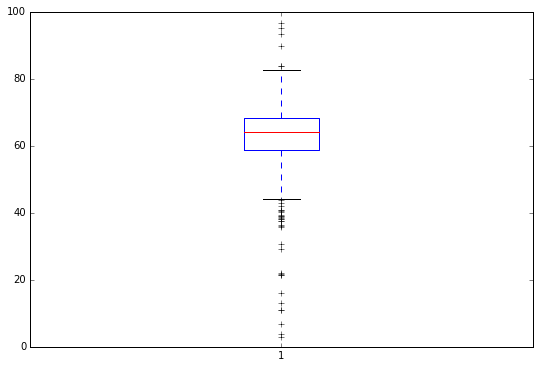

In [13]:
fig1 = plt.figure(1, figsize=(9, 6))
ax1 = fig1.add_subplot(111)
bp1 = ax1.boxplot(np.array(domains_avg_list))

In [15]:
[item.get_ydata() for item in bp1['whiskers']]

[array([ 58.63375127,  44.26022329]), array([ 68.39532936,  82.69075949])]

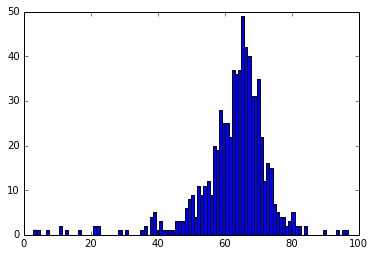

In [24]:
h1 = plt.hist(np.array(domains_avg_list), bins=100)

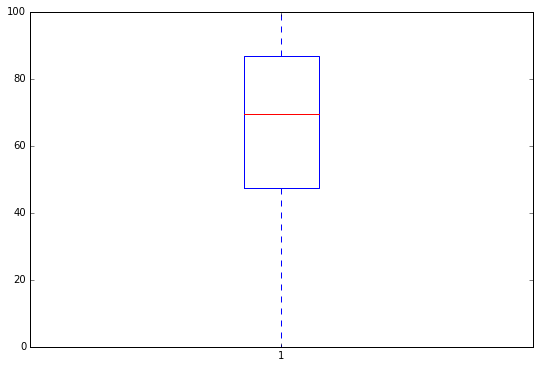

In [14]:
fig2 = plt.figure(1, figsize=(9, 6))
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot(np.array(mean_cov_list))

In [16]:
[item.get_ydata() for item in bp2['whiskers']]

[array([ 47.47,   0.  ]), array([ 86.95,  99.99])]

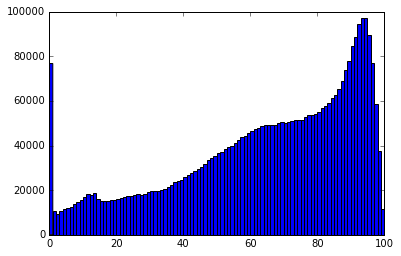

In [25]:
h2 = plt.hist(np.array(mean_cov_list), bins=100)

In [28]:
np.percentile(mean_cov_list,10)

21.969999999999999